**Numerical Methods in Science and Engineering**  
**Chapter:** 4  
**Exercise:** 24  
  
**Author:** Supakorn Suttiruang (Lum) 6031857321  
  

**Problem Statement:** 

Derive the cubic spline interpolation function for the air density in front of an airfoil which moves at a supersonic speed data table below:

| $x$   | $\rho$ | $x$   | $\rho$ |
|-------|--------|-------|--------|
| 1.000 | 4.2    | 1.200 | 15.2   |
| 1.020 | 4.8    | 1.204 | 18.7   |
| 1.040 | 5.1    | 1.208 | 23.5   |
| 1.060 | 5.2    | 1.212 | 28.9   |
| 1.080 | 5.3    | 1.216 | 34.0   |
| 1.100 | 5.5    | 1.220 | 38.3   |
| 1.120 | 5.8    | 1.228 | 42.7   |
| 1.140 | 6.1    | 1.236 | 45.3   |
| 1.160 | 6.5    | 1.244 | 46.2   |
| 1.180 | 7.4    | 1.250 | 46.4   |
| 1.189 | 9.1    | 1.300 | 46.4   |
| 1.196 | 12.9   | 1.400 | 46.4   |

Provide comments if the Lagrange polynomial interpolation method is used to fit the same set of data

**Derivation of Solution:** (The derivation of solution is included in the section below)

**Code Listing and Solution:** 


Preamble:

In [92]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (6, 5)
plt.rcParams['figure.dpi'] = 100
%config InlineBackend.figure_format = 'retina'

First, we define the data table as a dictionary,

In [2]:
f = {
    1.000: 4.2,
    1.020: 4.8,
    1.040: 5.1,
    1.060: 5.2,
    1.080: 5.3,
    1.100: 5.5,
    1.120: 5.8,
    1.140: 6.1,
    1.160: 6.5,
    1.180: 7.4,
    1.189: 9.1,
    1.196: 12.9,
    1.200: 15.2,
    1.204: 18.7,
    1.208: 23.5,
    1.212: 28.9,
    1.216: 34.0,
    1.220: 38.3,
    1.228: 42.7,
    1.236: 45.3,
    1.244: 46.2,
    1.250: 46.4,
    1.300: 46.4,
    1.400: 46.4,
}

n = len(f)

And provide a way to access the value of the function by the position of the x-value,

In [19]:
x_val = list(f.keys())

def f_idx(f:dict, idx: int):
    return f[x_values[idx]]

Solving for the cubic spline directly will be difficult since there are $96$ unknowns to be solved, and this requires a lot of computational power (in fact I've tried the direct approach with my PC and the program ran for hours before I gave up). So we're going to use the alternative approach.

Now we will set up the system of equations in Equation 4.54 which is derived from Equation 4.52 to solve for all the second derivatives

In [37]:
d2f = list(sym.symbols('d2f:{}'.format(n)))
# Equation  4.53
d2f[0] = 0
d2f[n-1] = 0
d2f = tuple(d2f)
d2f

(0,
 d2f1,
 d2f2,
 d2f3,
 d2f4,
 d2f5,
 d2f6,
 d2f7,
 d2f8,
 d2f9,
 d2f10,
 d2f11,
 d2f12,
 d2f13,
 d2f14,
 d2f15,
 d2f16,
 d2f17,
 d2f18,
 d2f19,
 d2f20,
 d2f21,
 d2f22,
 0)

In [45]:
system = []

for i in range(1, n-1):
    system.append(
        ((x_val[i] - x_val[i-1]) * d2f[i-1]) +
        (2 * (x_val[i+1] - x_val[i-1]) * d2f[i]) +
        ((x_val[i+1] - x_val[i]) * d2f[i+1]) -
        (
            ((6 / (x_val[i+1] - x_val[i])) * (f_idx(f, i+1) - f_idx(f, i))) +
            ((6 / (x_val[i] - x_val[i-1])) * (f_idx(f, i-1) - f_idx(f, i)))
        )
    )

from sympy.solvers.solveset import nonlinsolve

d2f_val = nonlinsolve(system, d2f)
d2f_val = next(iter(d2f_val))

Now we can construct the spline functions,

In [112]:
spline = []

for i in range(1, n):
    spline.append(
        lambda x, i=i: (
            (((d2f_val[i-1]) / (6 * (x_val[i] - x_val[i-1]))) * ((x_val[i] - x) ** 3)) +
            (((d2f_val[i]) / (6 * (x_val[i] - x_val[i-1]))) * ((x - x_val[i-1]) ** 3)) +
            (((f_idx(f, i-1)/(x_val[i] - x_val[i-1])) - (((x_val[i] - x_val[i-1]) * d2f_val[i-1])/6)) * (x_val[i] - x)) +
            (((f_idx(f, i)/(x_val[i] - x_val[i-1])) - (((x_val[i] - x_val[i-1]) * d2f_val[i])/6)) * (x - x_val[i-1]))
        )
    )

Now we plot the results,

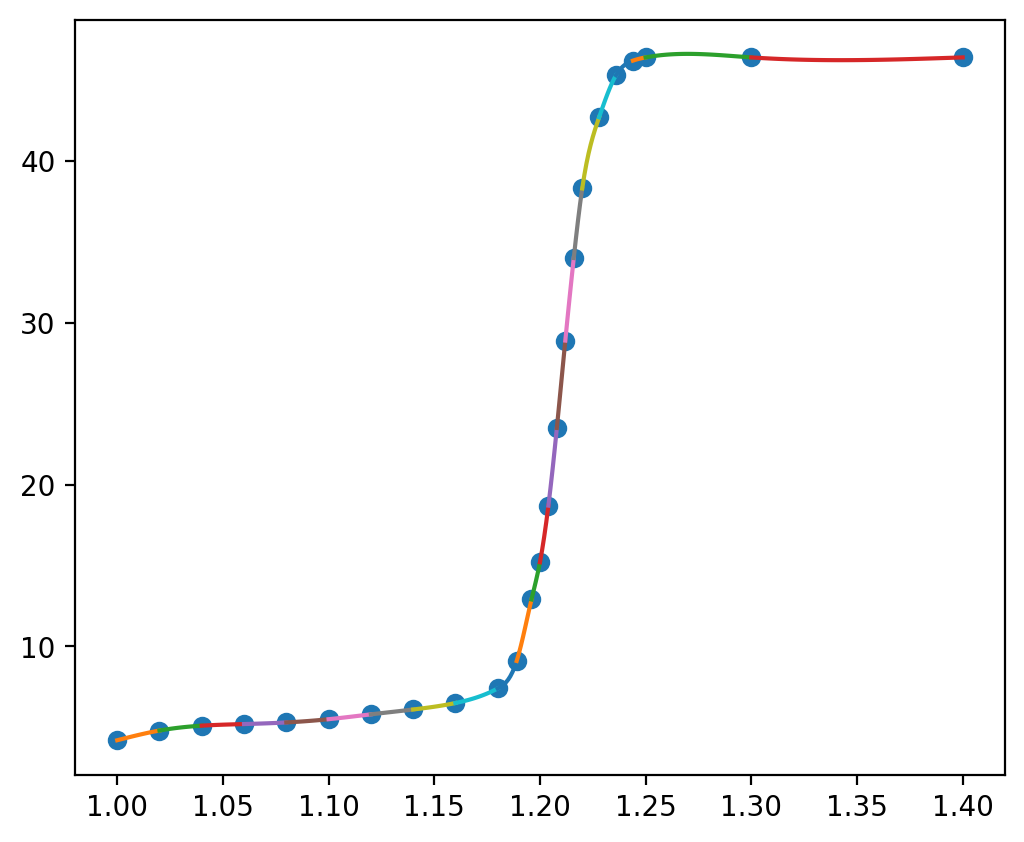

In [111]:
plt.plot(x_val, list(f.values()), 'o')

dx = 0.001
CS = []

for i in range(n-1):
    x_range = np.arange(x_val[i], x_val[i+1] + dx, dx)
    plt.plot(x_range, spline[i](x_range))

plt.show()

Now what if we use the Lagrange polynomial method?

In [113]:
def lagrange_interpolation(i:int, x:float, f:dict):
    x_points = list(f.keys())
    result = 1
    
    for j in range(len(f)):
        if j != i:
            result *= (x - x_points[j]) / (x_points[i] - x_points[j])
    return result

In [114]:
def lagrange_nth_order_interpolation(x: float, f:dict):
    x_points = list(f.keys())
    result = 0
    for i in range(len(f)):
        result += lagrange_interpolation(i, x, f) * f[x_points[i]]
    return result

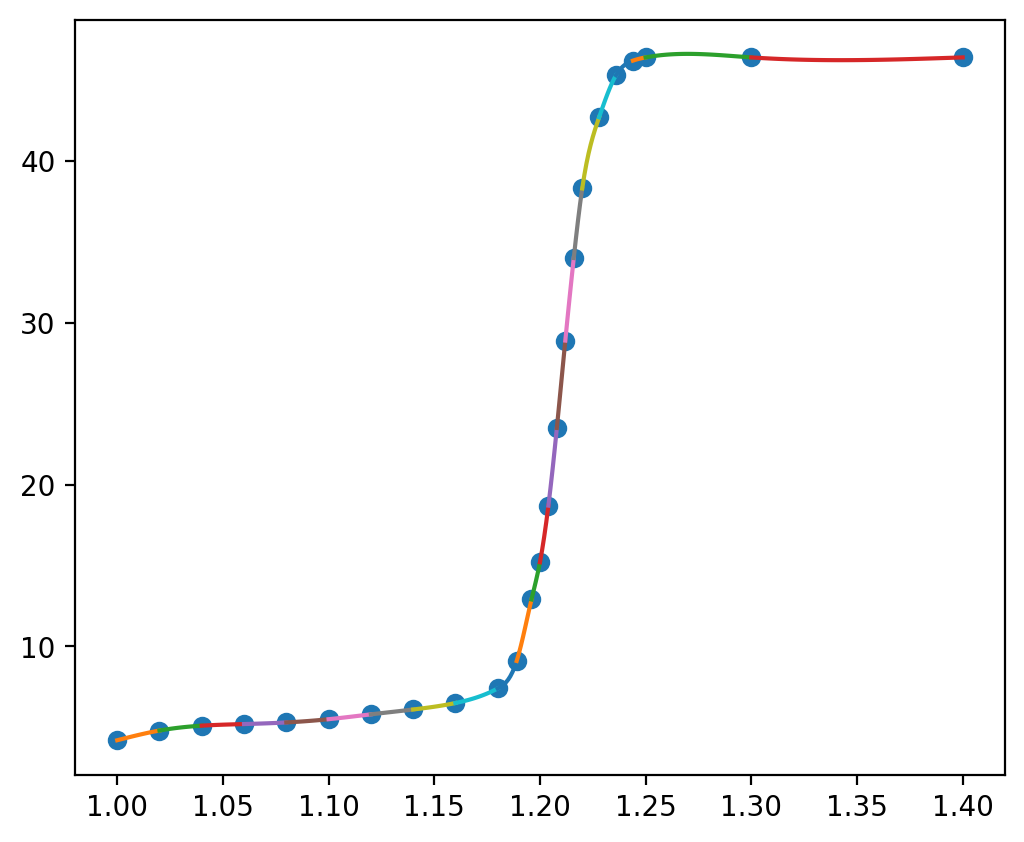

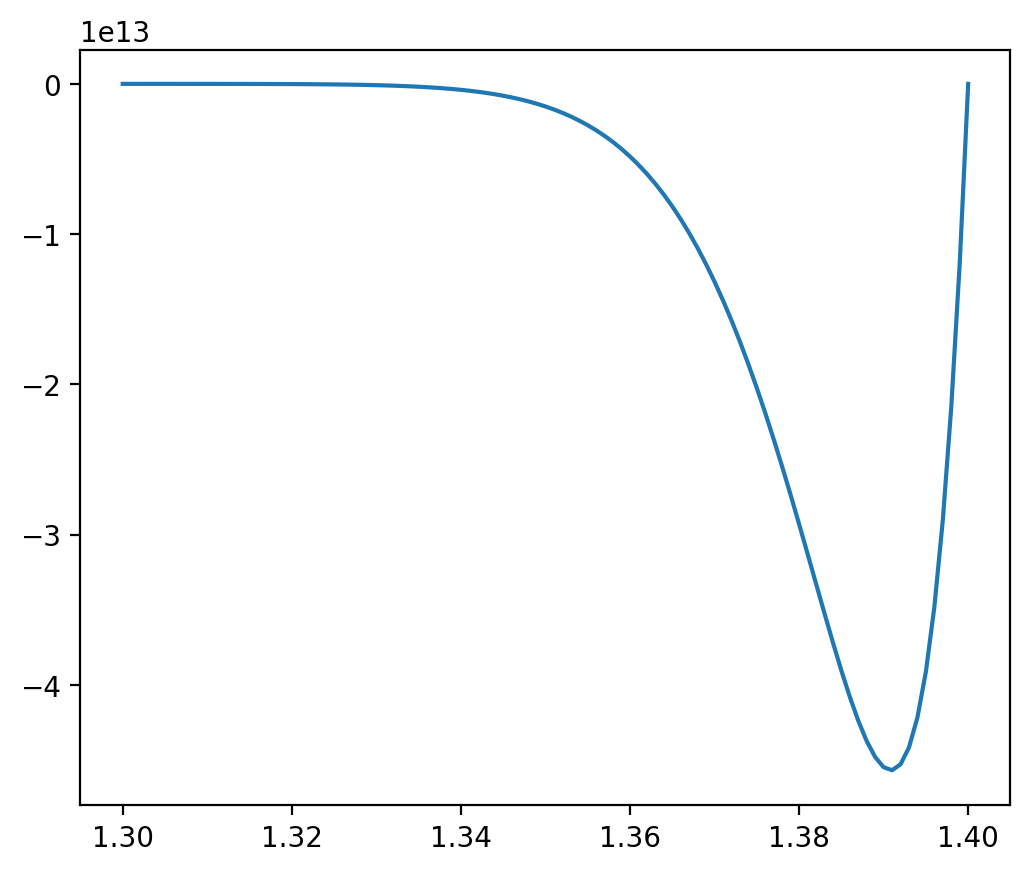

In [117]:
plt.plot(x_val, list(f.values()), 'o')

dx = 0.001
CS = []

for i in range(n-1):
    x_range = np.arange(x_val[i], x_val[i+1] + dx, dx)
    plt.plot(x_range, spline[i](x_range))

plt.show()

LP = list(map(lambda x: lagrange_nth_order_interpolation(x, f), x_range))
plt.plot(x_range, LP, label="Lagrange Polynomial Interpolation")

plt.show()

It can be shown that the Lagrange interpolation method cannot be applied in the problem